In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("insurance.csv")



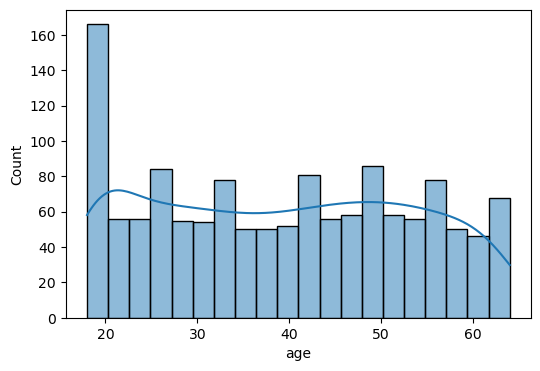

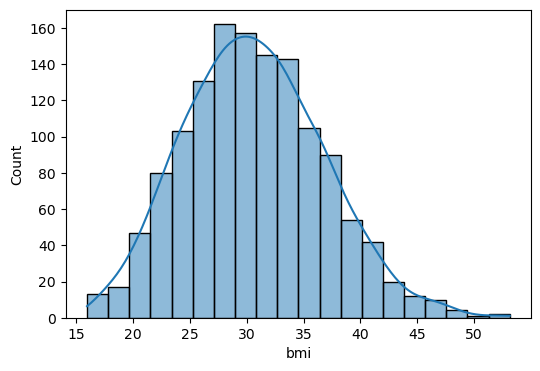

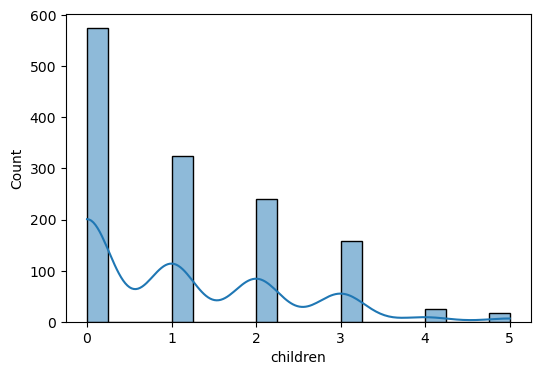

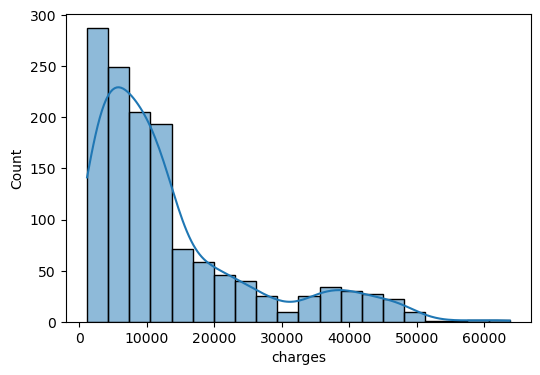

In [3]:
numeric_columns=['age', 'bmi', 'children', 'charges']
for num in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[num],kde=True,bins=20)

<Axes: xlabel='children', ylabel='count'>

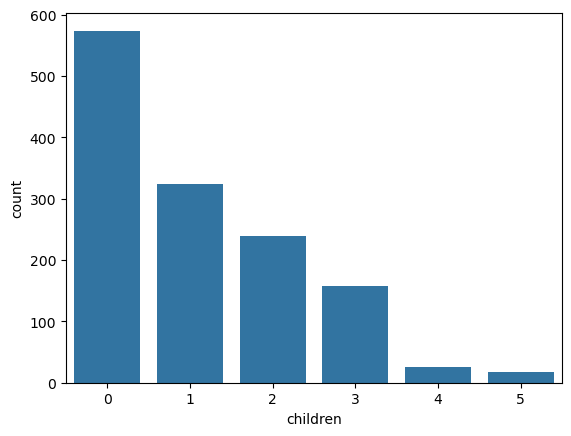

In [4]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

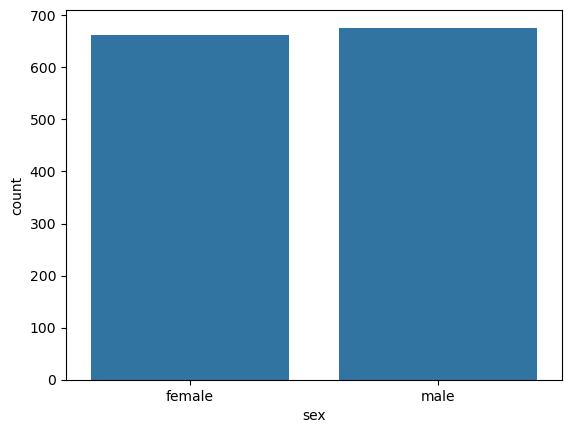

In [5]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

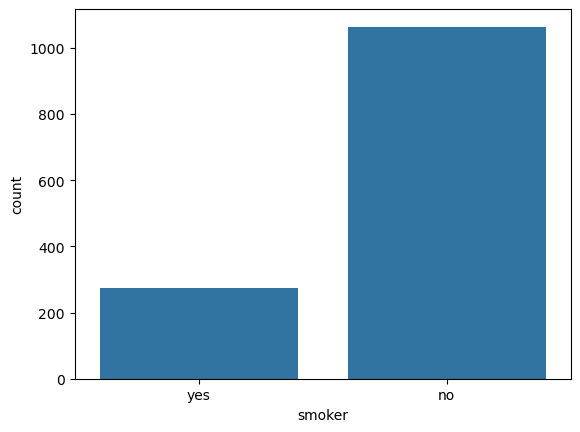

In [6]:
sns.countplot(x=df['smoker'])

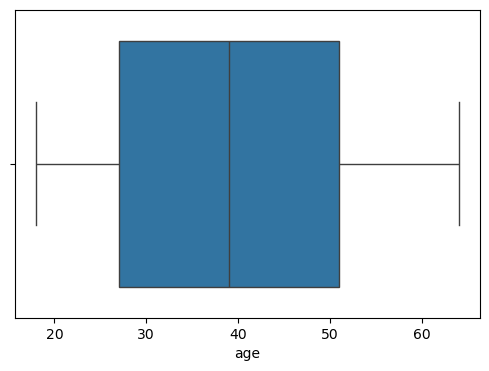

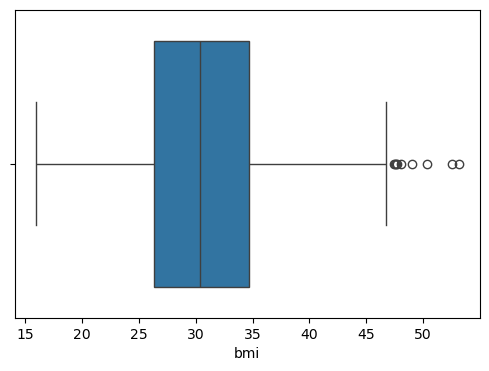

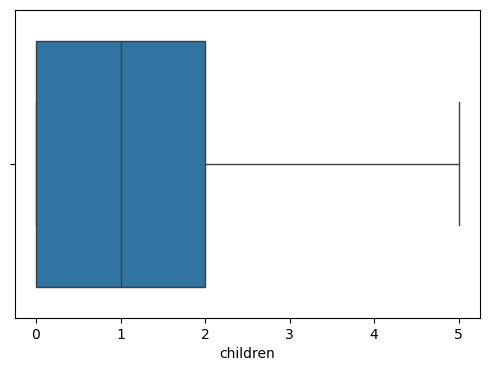

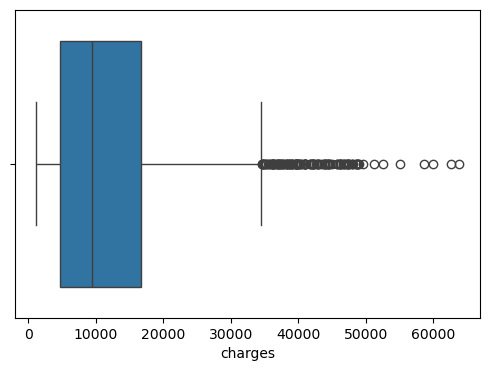

In [7]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    

<Axes: >

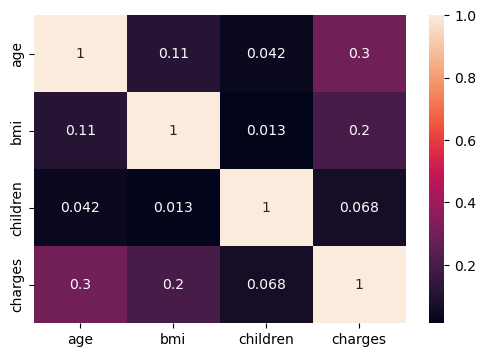

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Cleaning and Preprocessing


In [10]:
df_cleaned=df.copy()
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.shape

(1337, 7)

In [11]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [12]:
df_cleaned['sex']=df_cleaned['sex'].map({"male":0,"female":1})

df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [13]:
df_cleaned['smoker']=df_cleaned['smoker'].map({"no":0,"yes":1})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [14]:
df_cleaned.rename(columns={
    'sex':'is_female',
    'smoker':'is_smoker'
},inplace=True)

In [15]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [16]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [17]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)

In [18]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [19]:
df_cleaned=df_cleaned.astype(int)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


# Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

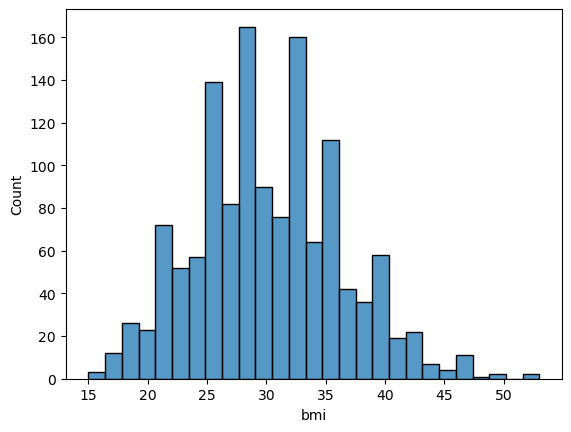

In [21]:
sns.histplot(df_cleaned['bmi'])

In [22]:
df_cleaned['bmi_category']=pd.cut(
    df_cleaned['bmi'],bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['underweight','Normal','Overweight','Obese']
)

In [23]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese
1334,18,1,31,0,0,2205,0,0,0,Obese
1335,18,1,36,0,0,1629,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [24]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=True)

In [25]:
df_cleaned=df_cleaned.astype(int)

In [26]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


In [27]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [28]:
from sklearn.preprocessing import StandardScaler
cols=['age','bmi','children']
scalar=StandardScaler()
df_cleaned[cols]=scalar.fit_transform(df_cleaned[cols])
df_cleaned.head()


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


charges                    1.000000
is_smoker                  0.787234
age                        0.298309
bmi_category_Obese         0.200348
bmi                        0.196236
bmi_category_Overweight   -0.120601
bmi_category_Normal       -0.104042
region_southeast           0.073577
children                   0.067390
is_female                 -0.058046
region_southwest          -0.043637
region_northwest          -0.038695
Name: charges, dtype: float64


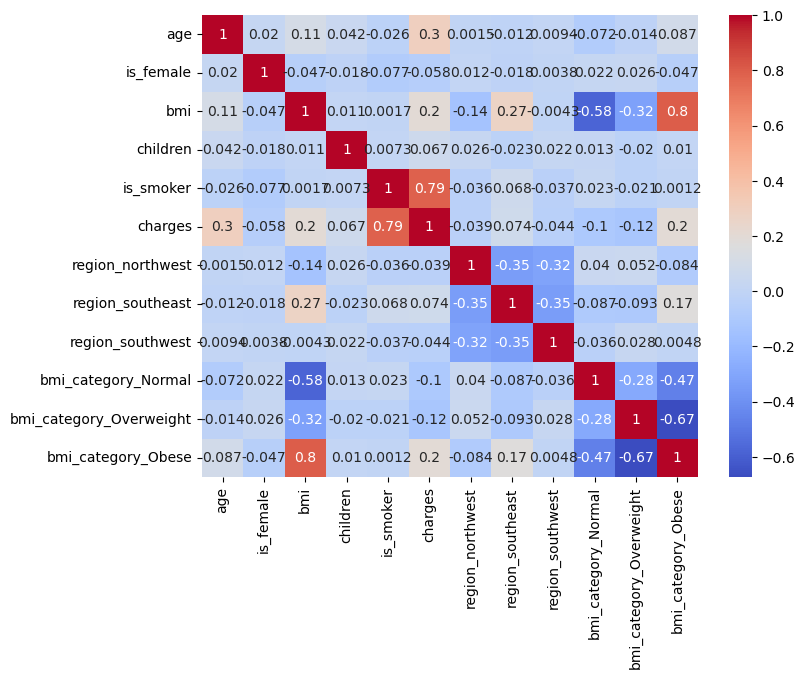

In [29]:
correlations = df_cleaned.corr()['charges'].sort_values(key=abs, ascending=False)

print(correlations)

# Optional: heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.show()

In [30]:

correlations = df_cleaned.corr()['charges'].sort_values(key=abs, ascending=False)
print("Correlations with charges:\n", correlations)




threshold = 0.2
selected_features = correlations[abs(correlations) > threshold].index.tolist()


bmi_categories = [col for col in df_cleaned.columns if 'bmi_category' in col]
if 'bmi' in selected_features:
    selected_features = [f for f in selected_features if f not in bmi_categories]


selected_features.remove('charges')

print("Selected features for the model:", selected_features)

Correlations with charges:
 charges                    1.000000
is_smoker                  0.787234
age                        0.298309
bmi_category_Obese         0.200348
bmi                        0.196236
bmi_category_Overweight   -0.120601
bmi_category_Normal       -0.104042
region_southeast           0.073577
children                   0.067390
is_female                 -0.058046
region_southwest          -0.043637
region_northwest          -0.038695
Name: charges, dtype: float64
Selected features for the model: ['is_smoker', 'age', 'bmi_category_Obese']


In [31]:
df_final=df_cleaned[['is_smoker', 'age', 'bmi_category_Obese']]


In [32]:
df_final

,is_smoker,age,bmi_category_Obese
0,1,-1.440418,0
1,0,-1.511647,1
2,0,-0.799350,1
3,0,-0.443201,0
4,0,-0.514431,0
...,...,...,...
1333,0,0.767704,1
1334,0,-1.511647,1
1335,0,-1.511647,1
1336,0,-1.297958,0


In [91]:
y=df_cleaned['charges']
X=df_final
y

0       16884
1        1725
2        4449
3       21984
4        3866
        ...  
1333    10600
1334     2205
1335     1629
1336     2007
1337    29141
Name: charges, Length: 1337, dtype: int32

In [71]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [79]:
from sklearn.linear_model import LinearRegression

In [83]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred=model.predict(X_test)



In [111]:
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_pred)
r2



0.8004619993294637

In [113]:
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("R² on training data:", r2_train)


R² on training data: 0.7326452672610744


In [115]:
import joblib

# Save your trained model
joblib.dump(model, 'regression_model.pkl')


['regression_model.pkl']